<a href="https://colab.research.google.com/github/ktripa/CPSC-8430-HW1/blob/main/Q32_generalizationVSParams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [28]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import os
import matplotlib.pyplot as plt
from google.colab import files

In [29]:
mnist=keras.datasets.mnist
(train_images,train_labels), (test_images,test_labels) = mnist.load_data()
train_images= tf.keras.utils.normalize(train_images,axis=1)
test_images= tf.keras.utils.normalize(test_images,axis=1)

In [57]:
dense1=np.arange(5,200,30)
dense2=np.arange(5,200,30)
dense1

array([  5,  35,  65,  95, 125, 155, 185])

In [58]:
x=len(dense1)
params=np.zeros((x,x))
loss=np.zeros((x,x))
v_loss=np.zeros((x,x))
acc=np.zeros((x,x))
v_acc=np.zeros((x,x))
history={}
for i in range(x):
  for j in range(x):
      model=keras.models.Sequential(
      [keras.layers.Flatten(),
       keras.layers.Dense(dense1[i],activation=tf.nn.relu),
       keras.layers.Dense(dense2[j],activation=tf.nn.relu),
       keras.layers.Dense(10,activation=tf.nn.softmax),
       ]
       )
      model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
      history= model.fit(train_images, train_labels, validation_split=0.1, epochs=5)
      params[i,j]=model.count_params()
      #params.append(model.count_params())
      
      loss[i,j]=history.history['loss'][-1]
      acc[i,j]=history.history['accuracy'][-1]
      v_loss[i,j]=history.history['val_loss'][-1]
      v_acc[i,j]=history.history['val_accuracy'][-1]


Epoch 1/5
1688/1688 [==============================] - 4s 2ms/step - loss: 1.5651 - accuracy: 0.4452 - val_loss: 0.6708 - val_accuracy: 0.8030
Epoch 2/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.7187 - accuracy: 0.7778 - val_loss: 0.5459 - val_accuracy: 0.8333
Epoch 3/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.5983 - accuracy: 0.8128 - val_loss: 0.4642 - val_accuracy: 0.8620
Epoch 4/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.5038 - accuracy: 0.8476 - val_loss: 0.4203 - val_accuracy: 0.8767
Epoch 5/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4721 - accuracy: 0.8599 - val_loss: 0.3927 - val_accuracy: 0.8857
Epoch 1/5
1688/1688 [==============================] - 4s 2ms/step - loss: 1.0912 - accuracy: 0.6378 - val_loss: 0.3982 - val_accuracy: 0.8787
Epoch 2/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4417 - accuracy: 0.8661 - val_loss: 0.3523 - val_accuracy: 0.8922

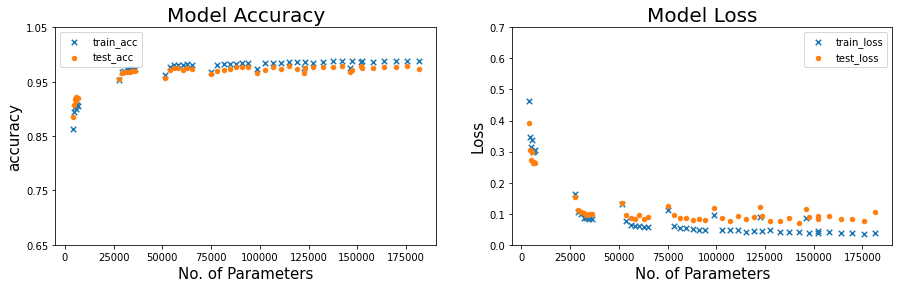

In [77]:
fig = plt.figure(figsize=(15,4))
# two subplots
#accuracy
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(params,acc,label='train_acc',marker='x',s=30)
ax1.scatter(params,v_acc,label='test_acc',s=20)
ax1.legend(loc='best')
ax1.set_yticks(np.arange(0.65,1.1,0.1))
ax1.set_xlabel('No. of Parameters',fontsize=15)
ax1.set_ylabel("accuracy",fontsize=15)
ax1.set_title('Model Accuracy',fontsize=20)
ax1.legend(loc='best')
#plt.yticks(np.arange(0.93,1.05,0.03))
# loss
ax2 = fig.add_subplot(1,2,2)
ax2.scatter(params,loss,label='train_loss',marker='x',s=30)
ax2.scatter(params,v_loss,label='test_loss',s=20)
ax2.legend(loc='best')
ax2.set_xlabel('No. of Parameters',fontsize=15)
ax2.set_yticks(np.arange(0,0.8,0.1))
ax2.set_ylabel("Loss",fontsize=15)
ax2.set_title('Model Loss',fontsize=20)
ax2.legend(loc='upper right')
#plt.yticks(np.arange(0.93,1.05,0.03))